In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [39]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [40]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [41]:
X = df.drop(['total'],axis = 1)
y = df['total']

In [42]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [43]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue']= venue_encoder.fit_transform(X['venue'])
X['bat_team']= batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team']= bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import Huber
model = Sequential([
    Input( shape=(X_train_scaled.shape[1],)), 
    Dense(512,activation = 'relu'),
    Dense(216,activation = 'relu'),
    Dense(1,activation = 'linear')
])

huber_loss = Huber(delta = 1)

model.compile(optimizer = 'adam',loss = huber_loss)

In [47]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 54.1908 - val_loss: 22.0654
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.2840 - val_loss: 21.9796
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.2260 - val_loss: 22.2990
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.2482 - val_loss: 21.8730
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.1393 - val_loss: 21.8262
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.0703 - val_loss: 21.8289
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.1034 - val_loss: 21.8286
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.0779 - val_loss: 21.8030
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.1451 - val_loss: 22.1921
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.0101 - val_loss: 21.7711
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.0819 - val_loss: 22.2726
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

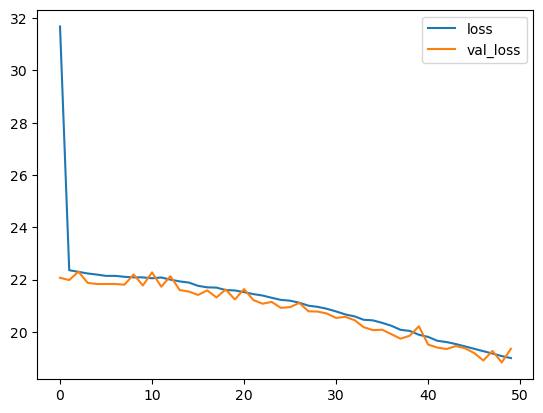

In [48]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [55]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,y_pred)

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


19.8439334403525

In [62]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options = df['venue'].unique().tolist(),description = 'Select venue')
batting_team = widgets.Dropdown(options = df['bat_team'].unique().tolist(),description = 'Select batting team')
bowling_team = widgets.Dropdown(options = df['bowl_team'].unique().tolist(),description = 'Select bowling team')
batsman = widgets.Dropdown(options = df['batsman'].unique().tolist(),description = 'Select batsman')
bowler = widgets.Dropdown(options = df['bowler'].unique().tolist(),description = 'Select bowler')

predict_button = widgets.Button(description = "Predict Score")


In [76]:
def predict_score(b):
    with output:
        clear_output()
        
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_batsman = batsman_encoder.transform([batsman.value])
        decoded_bowler= bowler_encoder.transform([bowler.value])
        
        input = np.array([decoded_venue,decoded_batting_team,decoded_bowling_team,decoded_batsman,decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
        
        print(predicted_score)

In [77]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select venue', index=18, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association S…

Dropdown(description='Select batting team', index=8, options=('Kolkata Knight Riders', 'Chennai Super Kings', …

Dropdown(description='Select bowling team', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi …

Dropdown(description='Select Striker:', index=5, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Husse…

Dropdown(description='Select bowler', index=49, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Jo…

Button(description='Predict Score', style=ButtonStyle())

Output()